In [1]:
import sys

assert sys.version_info >= (3, 7)
import pandas as pd

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Convert nominal to ordinal - Preprocessing
We will use OneHotEncoder for this because it allows us to separate the variables in a way in which we don't give more weight to a value. The numerical variables will be scaled to 

In [3]:
import openml
import pandas as pd

# Get Dataset from OPENML
dataset = openml.datasets.get_dataset(23)


df, *_ = dataset.get_data()

# Get features as X
X = df.drop('Contraceptive_method_used',axis=1)


# Get class as y
y = df['Contraceptive_method_used']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train_c2 = X_train.copy()
X_test_c2 = X_test.copy()

#Use dummies
categorical_features = ["Wifes_education",'Husbands_occupation',"Husbands_education","Standard-of-living_index" ]
X_train_enc2 = pd.get_dummies(X_train_c2, columns=categorical_features, drop_first=True)
X_test_enc2 = pd.get_dummies(X_test_c2, columns=categorical_features, drop_first=True)

X_test_enc2 = X_test_enc2.reindex(columns=X_train_enc2.columns, fill_value=0)
X_test_enc2

,Wifes_age,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Media_exposure,Wifes_education_2,Wifes_education_3,Wifes_education_4,Husbands_occupation_2,Husbands_occupation_3,Husbands_occupation_4,Husbands_education_2,Husbands_education_3,Husbands_education_4,Standard-of-living_index_2,Standard-of-living_index_3,Standard-of-living_index_4
852,29,4,1,1,0,False,True,False,False,True,False,False,True,False,False,False,True
184,35,5,1,0,0,False,True,False,True,False,False,False,False,True,True,False,False
1261,23,1,0,1,0,False,False,True,False,False,False,False,False,True,False,False,True
67,30,3,1,1,0,True,False,False,False,True,False,False,True,False,False,False,False
220,22,1,1,1,0,True,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,38,3,1,0,0,False,False,True,False,False,False,False,False,True,False,False,True
946,25,1,1,1,0,True,False,False,False,True,False,True,False,False,False,True,False
522,25,4,1,1,0,False,True,False,False,True,False,False,False,False,False,False,False
874,24,3,1,1,0,False,False,True,False,True,False,False,True,False,False,True,False


# KNeighborsClassifier
It's a non-parametric supervised learning classifier, which uses proximity to make classifications it works by the assumption that similar points can be found near one another. The value of k represents how many neighbors will be checked to determine the classification of a specific point. It is usually recommended to use odd numbers, to avoid ties in classification.


| Advantages                                                               | Disadvantages         
| -------------------------------------------------------------------------| -------------------------------------------------------------------------------------------------------|
| Adapts easily: the algorithms adjusts to account for any new data.       | Data does not scale well: time consuming, it takes memory and data storage.                            |
| Few hyperparameters: only needs k value and distance metric              | Doesn't perform well with high-dimensional data inputs.                                                | 
| Easy to implement                                                        | Prone to overfitting: lower values of k can overfit data and higher values smooth out the data         |
|                                                                          | If k value is too high it can underfit data.                                                           |

(IBM, s.f.)


In [6]:

def dummies(X_train, X_test, categorical_features):
    X_train_c2 = X_train.copy()
    X_test_c2 = X_test.copy()
    X_train_enc2 = pd.get_dummies(X_train_c2, columns=categorical_features, drop_first=True)
    X_test_enc2 = pd.get_dummies(X_test_c2, columns=categorical_features, drop_first=True)

    X_test_enc2 = X_test_enc2.reindex(columns=X_train_enc2.columns, fill_value=0)
    return X_train_enc2, X_test_enc2

In [7]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score


numeric_features = ["Wifes_age", "Number_of_children_ever_born"]  
categorical_features = ["Wifes_education",'Husbands_occupation',"Husbands_education","Standard-of-living_index" ]


X_train_enc2, X_test_enc2 = dummies(X_train, X_test, categorical_features)


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_model.fit(X_train_enc2, y_train)
y_pred_knn = knn_model.predict(X_test_enc2)


print(classification_report(y_test, y_pred_knn))

print("Test f1_score:", f1_score(y_test, y_pred_knn, average='weighted'))


              precision    recall  f1-score   support

           1       0.55      0.64      0.59       130
           2       0.42      0.24      0.31        71
           3       0.45      0.50      0.47        94

    accuracy                           0.50       295
   macro avg       0.48      0.46      0.46       295
weighted avg       0.49      0.50      0.49       295

Test f1_score: 0.4853259776234624


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=10, random_state=42)


param_grid = {
    'classifier__n_neighbors': list(range(1, 40)),
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__p': [1, 2],
    'classifier__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best weighted F1 score (CV):", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate on test data
print(classification_report(y_test, y_pred))
print("Test weighted f1_score:", f1_score(y_test, y_pred, average='weighted'))


Best parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 33, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best weighted F1 score (CV): 0.5192115838202476
              precision    recall  f1-score   support

           1       0.70      0.62      0.65       130
           2       0.41      0.23      0.29        71
           3       0.49      0.73      0.59        94

    accuracy                           0.56       295
   macro avg       0.53      0.52      0.51       295
weighted avg       0.56      0.56      0.54       295

Test weighted f1_score: 0.5449237445363353


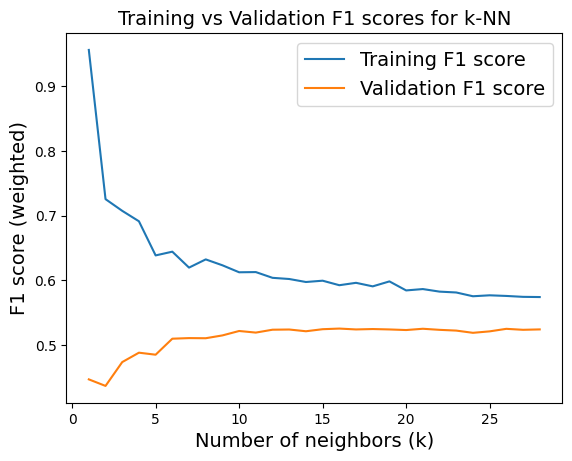

              precision    recall  f1-score   support

           1       0.70      0.62      0.65       130
           2       0.41      0.23      0.29        71
           3       0.49      0.73      0.59        94

    accuracy                           0.56       295
   macro avg       0.53      0.52      0.51       295
weighted avg       0.56      0.56      0.54       295

Test weighted f1_score: 0.5449237445363353


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=10, random_state=42)


#k_range = range(1, 29)
train_scores = []
val_scores = []



param_grid = {
    'classifier__n_neighbors': list(range(1, 40)),
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__p': [1, 2],
    'classifier__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
    model = Pipeline([ 
        ('classifier', knn)
    ])
    
    model.fit(X_train, y_train)
    train_score = f1_score(y_train, model.predict(X_train), average='weighted')
    train_scores.append(train_score)
    
    val_score = cross_val_score(model, X_train, y_train, cv=cv, 
                              scoring='f1_weighted', n_jobs=-1).mean()
    val_scores.append(val_score)

plt.plot(k_range, train_scores, label='Training F1 score')
plt.plot(k_range, val_scores, label='Validation F1 score')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('F1 score (weighted)')
plt.title('Training vs Validation F1 scores for k-NN')
plt.legend()
plt.show()



print(classification_report(y_test, y_pred))
print("Test weighted f1_score:", f1_score(y_test, y_pred, average='weighted'))


# References

IBM. (s.f.). ¿Qué es el algoritmo de k vecinos más cercanos (KNN)? https://www.ibm.com/mx-es/think/topics/knn


